# Netflix Content Strategy Analysis

DataSet Source = statso

Dataset Features  
1. Title                2. Available Globall
3. Release Date       
4. Hours Viewed     
5. Language Indicator   
6. Content Title

The dataset consists of Netflix content released globally in 2023, containing information on the title, release date, language, content type (show or movie), availability status, and viewership hours. The dataset allows exploration of patterns in viewership based on various attributes like content type, release season, language, and release day. The viewership data, represented in hours viewed, serves as a proxy for the popularity and audience engagement of each title.

# Goal

The goal is to analyze Netflix’s content strategy to understand how various factors like content type, language, release season, and timing affect viewership patterns. By identifying the best-performing content and the timing of its release, 

# Aim 

To uncover insights into how Netflix maximizes audience engagement throughout the year.

In [148]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings as w
w.filterwarnings('ignore')

In [149]:
netflix_data = pd.read_csv(r"C:\Users\areeb\Desktop\Personal Projects\Data Sets\netflix_content_2023.csv")

In [150]:
netflix_data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [151]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [152]:
netflix_data.describe()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
count,24812,24812,8166,24812,24812,24812
unique,19158,2,1783,889,6,2
top,The Night Agent: Season 1,No,2020-03-20,"1,00,000",English,Movie
freq,2,17162,28,4046,17268,14104


Let me start with cleaning and preprocessing the “Hours Viewed” column to prepare it for analysis

In [153]:
netflix_data['Hours Viewed'] = netflix_data['Hours Viewed'].replace(",", "", regex = True).astype(float)

In [154]:
netflix_data[['Title','Hours Viewed']].head()

,Title,Hours Viewed
0,The Night Agent: Season 1,812100000.0
1,Ginny & Georgia: Season 2,665100000.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0
3,Wednesday: Season 1,507700000.0
4,Queen Charlotte: A Bridgerton Story,503000000.0


The “Hours Viewed” column has been successfully cleaned and converted to a numeric format. Now, I’ll analyze trends in content type to determine whether shows or movies dominate viewership. Let’s visualize the distribution of total viewership hours between Shows and Movies

In [155]:
# aggregate viewership hours by content type
content_type_viewership = netflix_data.groupby('Content Type').sum()['Hours Viewed'].reset_index()
content_type_viewership.head()

,Content Type,Hours Viewed
0,Movie,5.063780e+10
1,Show,1.077641e+11


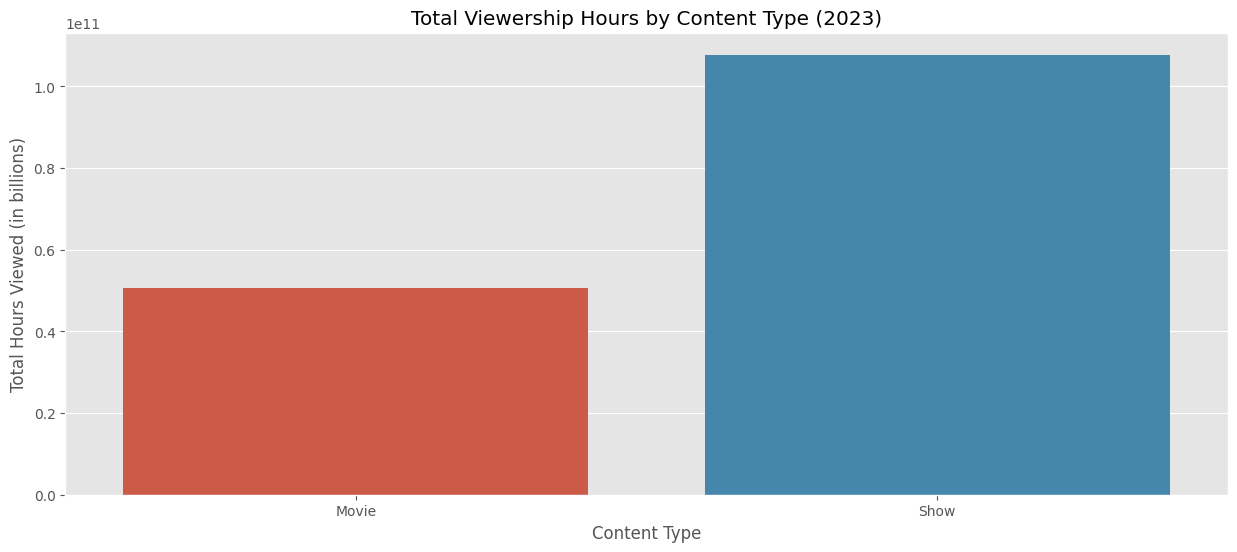

In [156]:
plt.figure( figsize = (15,6))

sns.barplot(data = content_type_viewership ,
            x = 'Content Type',
            y = 'Hours Viewed')

plt.title('Total Viewership Hours by Content Type (2023)')
plt.xlabel('Content Type')
plt.ylabel('Total Hours Viewed (in billions)')

plt.show()

The visualization indicates that shows dominate the total viewership hours on Netflix in 2023 compared to movies. This suggests that Netflix’s content strategy leans heavily toward shows, as they tend to attract more watch hours overall.

Next, let’s analyze the distribution of viewership across different languages to understand which languages are contributing the most to Netflix’s content consumption

In [157]:
# aggregate viewership hours by language
language_viewership = netflix_data.groupby('Language Indicator').sum()['Hours Viewed'].reset_index().sort_values(by = 'Hours Viewed', ascending = False)
language_viewership

,Language Indicator,Hours Viewed
0,English,1.244417e+11
3,Korean,1.537840e+10
4,Non-English,1.043910e+10
2,Japanese,7.102000e+09
1,Hindi,9.261000e+08
5,Russian,1.146000e+08


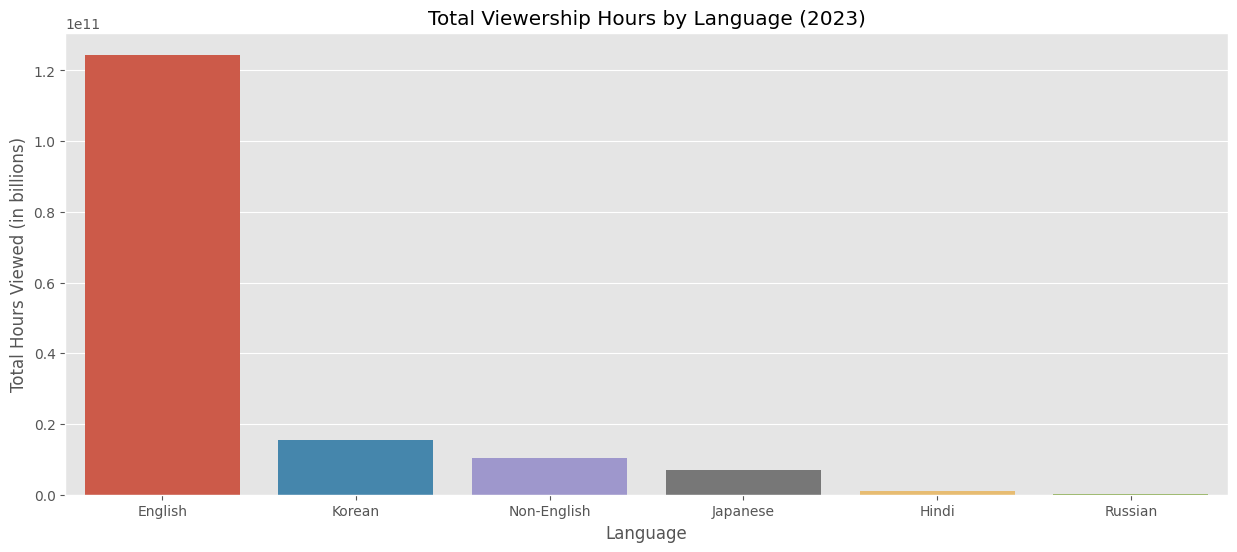

In [158]:
plt.figure( figsize = (15,6))

sns.barplot(data = language_viewership ,
            x = 'Language Indicator',
            y = 'Hours Viewed')

plt.title('Total Viewership Hours by Language (2023)')
plt.xlabel('Language')
plt.ylabel('Total Hours Viewed (in billions)')
plt.show()

The visualization reveals that English-language content significantly dominates Netflix’s viewership, followed by other languages like Korean. It indicates that Netflix’s primary audience is consuming English content, although non-English shows and movies also have a considerable viewership share, which shows a diverse content strategy.

Next, I’ll analyze how viewership varies based on release dates to identify any trends over time, such as seasonality or patterns around specific months

In [159]:
netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'])

In [160]:
netflix_data['Release Month'] = netflix_data['Release Date'].dt.month

In [161]:
netflix_data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,3.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,1.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,12.0
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show,11.0
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie,5.0


In [162]:
# aggregate viewership hours by release month
monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum().reset_index()
monthly_viewership

,Release Month,Hours Viewed
0,1.0,7.271600e+09
1,2.0,7.103700e+09
2,3.0,7.437100e+09
3,4.0,6.865700e+09
4,5.0,7.094600e+09
5,6.0,8.522000e+09
6,7.0,6.524800e+09
7,8.0,6.817800e+09
8,9.0,7.262200e+09
9,10.0,8.123200e+09


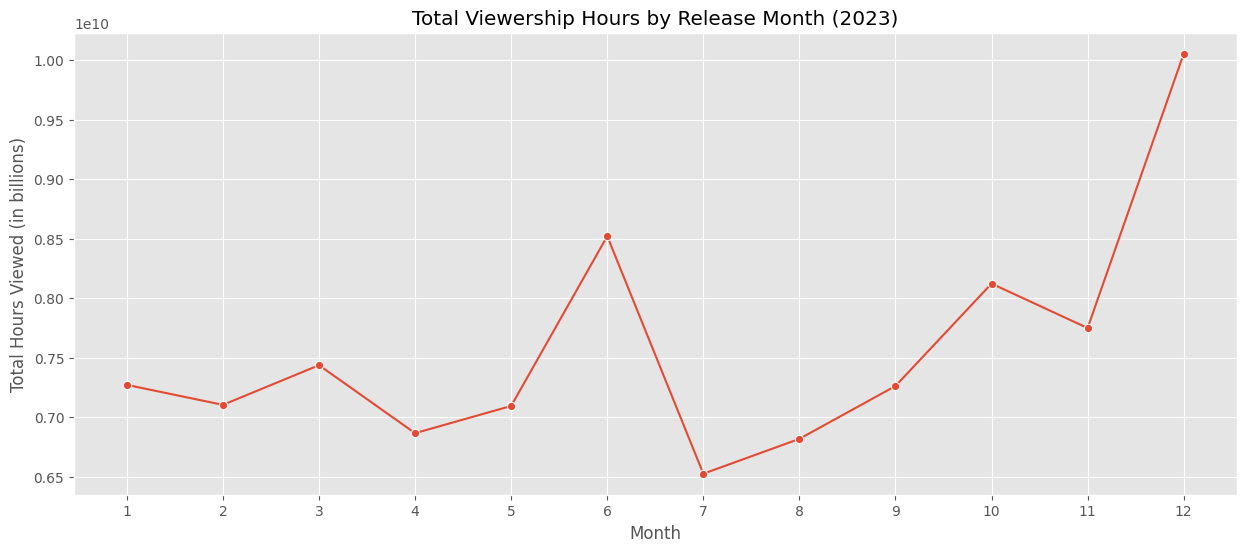

In [163]:
plt.figure( figsize = (15,6))

sns.lineplot( data = monthly_viewership,
             x = 'Release Month' , 
             y = 'Hours Viewed', 
             marker = 'o')

plt.xticks(range(1,13))
plt.title('Total Viewership Hours by Release Month (2023)')
plt.xlabel('Month')
plt.ylabel('Total Hours Viewed (in billions)')

plt.show()

The graph shows the total viewership hours by month, which reveals a notable increase in viewership during June and a sharp rise toward the end of the year in December. It suggests that Netflix experiences spikes in audience engagement during these periods, possibly due to strategic content releases, seasonal trends, or holidays, while the middle months have a steady but lower viewership pattern.

To delve deeper, we can analyze the most successful content (both shows and movies) and understand the specific characteristics, such as genre or theme, that may have contributed to high viewership:

In [164]:
# extract the top 5 titles based on viewership hours
top_5_titles = netflix_data.nlargest(5, 'Hours Viewed')
top_5_titles[['Title', 'Hours Viewed', 'Language Indicator', 'Content Type', 'Release Date']]

,Title,Hours Viewed,Language Indicator,Content Type,Release Date
0,The Night Agent: Season 1,812100000.0,English,Show,2023-03-23
1,Ginny & Georgia: Season 2,665100000.0,English,Show,2023-01-05
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,630200000.0,Korean,Movie,2023-06-17
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0,Korean,Show,2022-12-30
18214,ONE PIECE: Season 1,541900000.0,English,Show,2023-08-31


## The top 5 most-viewed titles on Netflix in 2023 are:

1. The Night Agent: Season 1 (English, Show) with 812.1 million hours viewed.
2. Ginny & Georgia: Season 2 (English, Show) with 665.1 million hours viewed.
3. King the Land: Limited Series (Korean, Movie) with 630.2 million hours viewed.
4. The Glory: Season 1 (Korean, Show) with 622.8 million hours viewed.
5. ONE PIECE: Season 1 (English, Show) with 541.9 million hours viewed.

English-language shows dominate the top viewership spots. But, Korean content also has a notable presence in the top titles, which indicates its global popularity.

Now, let’s have a look at the viewership trends by content type:

In [165]:
# aggregate viewership hours by content type and release month
monthly_viewership_by_type = netflix_data.pivot_table( index = 'Release Month' ,
                                                      columns = 'Content Type' ,
                                                      values = 'Hours Viewed' ,
                                                      aggfunc = 'sum')

In [166]:
monthly_viewership_by_type

Content Type,Movie,Show
Release Month,,
1.0,2.275900e+09,4.995700e+09
2.0,1.654400e+09,5.449300e+09
3.0,2.109400e+09,5.327700e+09
4.0,2.757600e+09,4.108100e+09
5.0,2.520500e+09,4.574100e+09
6.0,3.135800e+09,5.386200e+09
7.0,1.615700e+09,4.909100e+09
8.0,2.186400e+09,4.631400e+09
9.0,2.092300e+09,5.169900e+09


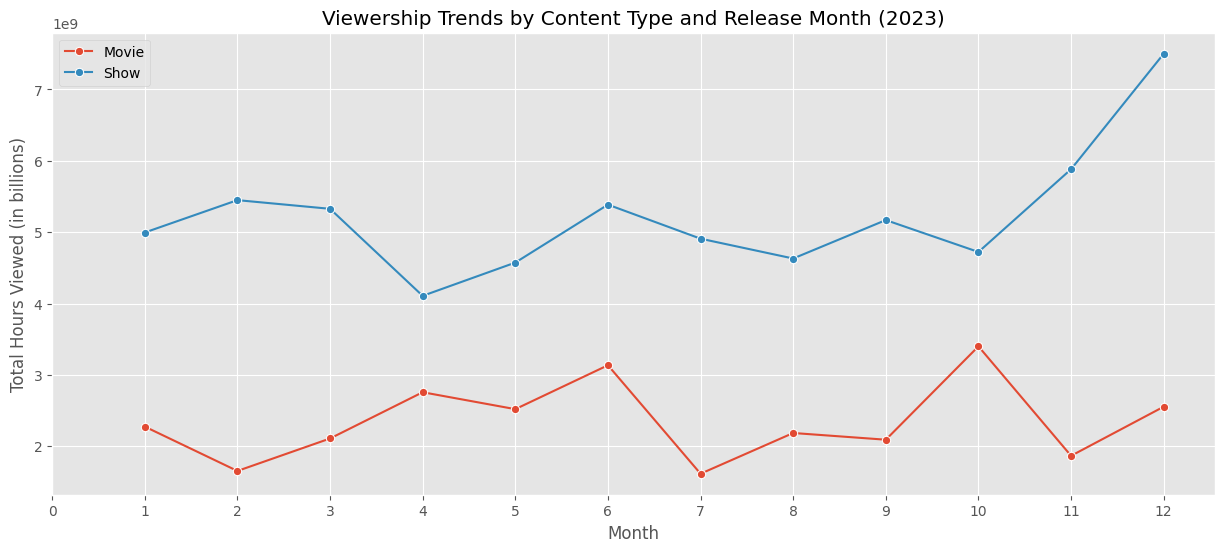

In [167]:
plt.figure( figsize = (15,6))

sns.lineplot( data = monthly_viewership_by_type , 
             x = monthly_viewership_by_type.index, 
             y = monthly_viewership_by_type['Movie'],
             marker = "o",
             label = 'Movie')

sns.lineplot( data = monthly_viewership_by_type , 
             x = monthly_viewership_by_type.index, 
             y = monthly_viewership_by_type['Show'],
             marker = "o",
             label = 'Show')

plt.legend()
plt.xticks(range(13))
plt.title('Viewership Trends by Content Type and Release Month (2023)')
plt.xlabel('Month')
plt.ylabel('Total Hours Viewed (in billions)')
plt.show()

The graph compares viewership trends between movies and shows throughout 2023. It shows that shows consistently have higher viewership than movies, peaking in December. Movies have more fluctuating viewership, with notable increases in June and October. This indicates that Netflix’s audience engages more with shows across the year, while movie viewership experiences occasional spikes, possibly linked to specific releases or events.

Now, let’s explore the total viewership hours distributed across different release seasons:

In [168]:
# defining seasons based on release months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

In [169]:
# applying the season categorization to the dataset
netflix_data['Release Season'] = netflix_data['Release Month'].apply(get_season)

In [170]:
# aggregate viewership hours by release season
seasonal_viewership = netflix_data.groupby('Release Season')['Hours Viewed'].sum()
seasonal_viewership

Release Season
Fall      9.070880e+10
Spring    2.139740e+10
Summer    2.186460e+10
Winter    2.443110e+10
Name: Hours Viewed, dtype: float64

In [171]:
# ordering the seasons as 'Winter', 'Spring', 'Summer', 'Fall'
seasons_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_viewership = seasonal_viewership.reindex(seasons_order)
seasonal_viewership

Release Season
Winter    2.443110e+10
Spring    2.139740e+10
Summer    2.186460e+10
Fall      9.070880e+10
Name: Hours Viewed, dtype: float64

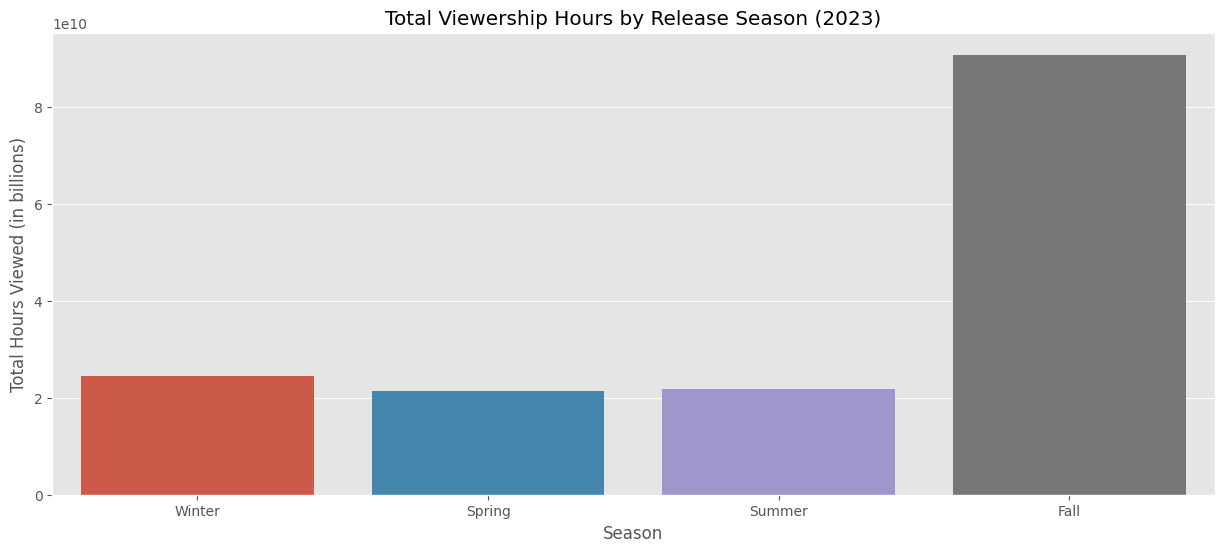

In [172]:
plt.figure( figsize = (15,6))

sns.barplot(x = seasonal_viewership.index ,
            y = seasonal_viewership.values )

plt.title('Total Viewership Hours by Release Season (2023)')
plt.xlabel('Season')
plt.ylabel('Total Hours Viewed (in billions)')

plt.show()

The graph indicates that viewership hours peak significantly in the Fall season, with over 80 billion hours viewed, while Winter, Spring, and Summer each have relatively stable and similar viewership around the 20 billion mark. This suggests that Netflix experiences the highest audience engagement during the Fall.

Now, let’s analyze the number of content releases and their viewership hours across months:

In [173]:
monthly_releases = netflix_data['Release Month'].value_counts().sort_index()

monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()

In [174]:
monthly_releases

Release Month
1.0     608
2.0     560
3.0     690
4.0     647
5.0     624
6.0     670
7.0     631
8.0     674
9.0     739
10.0    802
11.0    734
12.0    787
Name: count, dtype: int64

In [175]:
monthly_viewership

Release Month
1.0     7.271600e+09
2.0     7.103700e+09
3.0     7.437100e+09
4.0     6.865700e+09
5.0     7.094600e+09
6.0     8.522000e+09
7.0     6.524800e+09
8.0     6.817800e+09
9.0     7.262200e+09
10.0    8.123200e+09
11.0    7.749500e+09
12.0    1.005580e+10
Name: Hours Viewed, dtype: float64

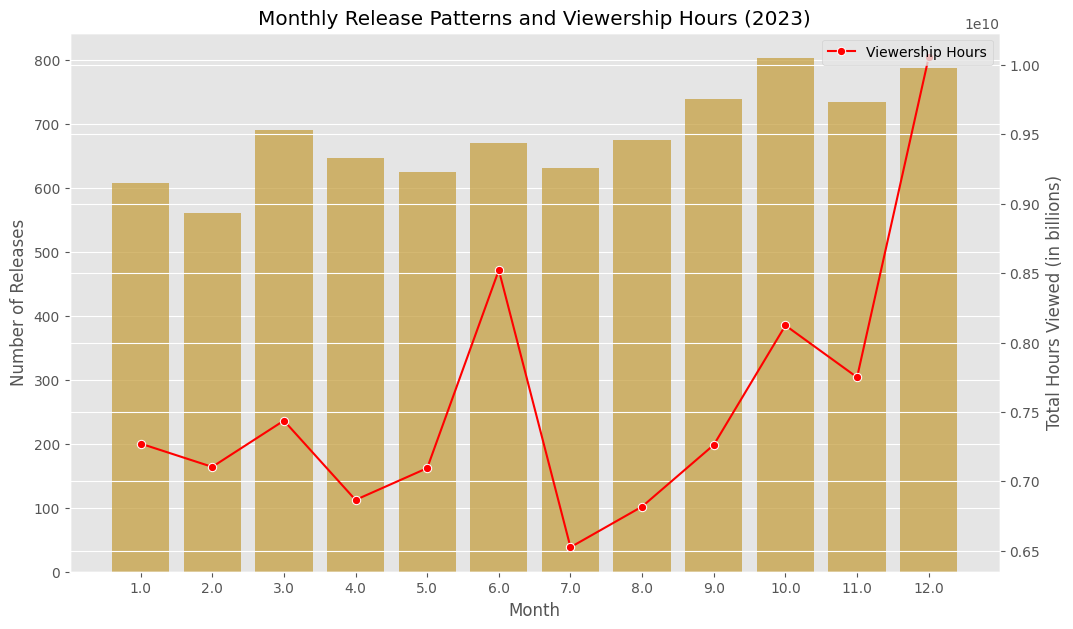

In [176]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot the bar chart on the primary y-axis
sns.barplot(x=monthly_releases.index, y=monthly_releases.values, ax=ax1, color='goldenrod', alpha=0.7)
ax1.set_ylabel('Number of Releases')
ax1.set_xlabel('Month')

# Create a secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(x=range(len(monthly_viewership)), y=monthly_viewership.values, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Total Hours Viewed (in billions)')

# Add titles and labels
plt.title('Monthly Release Patterns and Viewership Hours (2023)')
ax1.set_xticks(range(len(monthly_releases)))
ax1.set_xticklabels(monthly_releases.index)

ax2.legend(['Viewership Hours'], loc='upper right')

plt.show()

While the number of releases is relatively steady throughout the year, viewership hours experience a sharp increase in June and a significant rise in December, despite a stable release count. This indicates that viewership is not solely dependent on the number of releases but influenced by the timing and appeal of specific content during these months.

Next, let’s explore whether Netflix has a preference for releasing content on specific weekdays and how this influences viewership patterns:

In [177]:
netflix_data['Release Day'] = netflix_data['Release Date'].dt.day_name()

weekday_releases = netflix_data['Release Day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [178]:
weekday_releases

Release Day
Monday        436
Tuesday       995
Wednesday    1310
Thursday     1145
Friday       3863
Saturday      238
Sunday        179
Name: count, dtype: int64

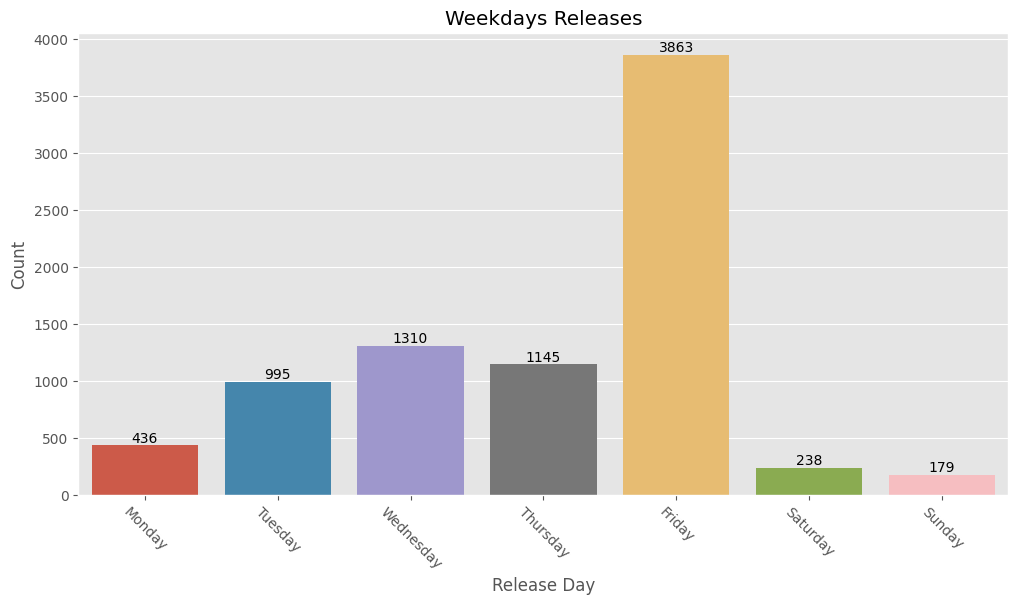

In [199]:
plt.figure( figsize = (12,6))

ax = sns.barplot(x = weekday_releases.index ,
            y = weekday_releases.values )

for i in ax.containers:
    ax.bar_label(i)


plt.ylabel('Count')
plt.xticks(rotation = -45)
plt.title('Weekdays Releases')
plt.show()

In [179]:
# aggregate viewership hours by day of the week
weekday_viewership = netflix_data.groupby('Release Day')['Hours Viewed'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [180]:
weekday_viewership

Release Day
Monday       3.954500e+09
Tuesday      5.562300e+09
Wednesday    1.574410e+10
Thursday     2.029280e+10
Friday       3.821720e+10
Saturday     5.121800e+09
Sunday       1.935300e+09
Name: Hours Viewed, dtype: float64

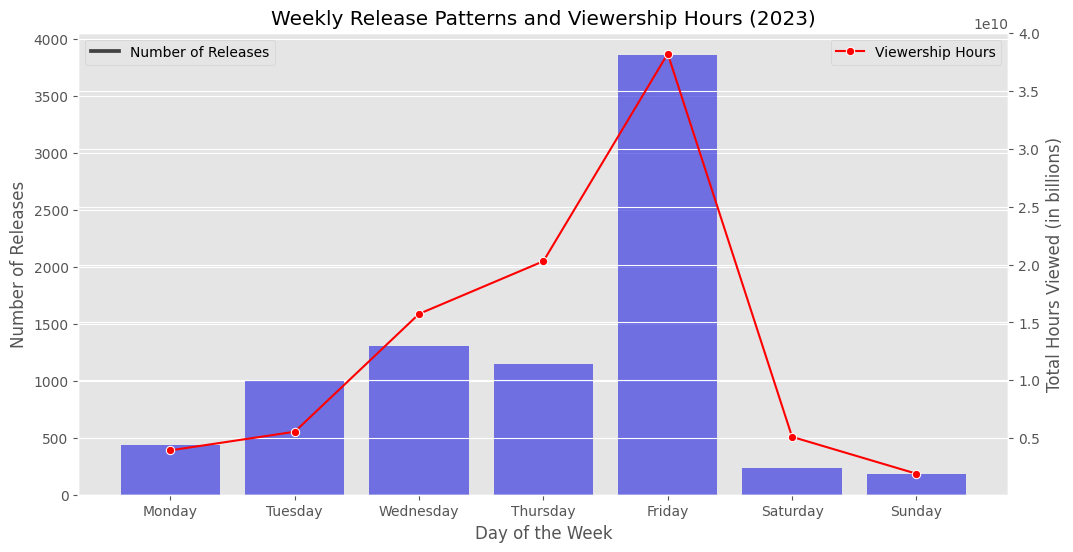

In [181]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# bar chart on the primary y-axis
sns.barplot(x=weekday_releases.index, y=weekday_releases.values, ax=ax1, color='blue', alpha=0.6)
ax1.set_ylabel('Number of Releases')
ax1.set_xlabel('Day of the Week')

# secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(x=weekday_viewership.index, y=weekday_viewership.values, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Total Hours Viewed (in billions)')

# titles and labels
plt.title('Weekly Release Patterns and Viewership Hours (2023)')
ax1.set_xticks(range(len(weekday_releases)))
ax1.set_xticklabels(weekday_releases.index)

ax1.legend(['Number of Releases'], loc='upper left')
ax2.legend(['Viewership Hours'], loc='upper right')

plt.show()

The graph highlights that most content releases occur on Fridays, with viewership hours also peaking significantly on that day. This suggests that Netflix strategically releases content toward the weekend to maximize audience engagement. The viewership drops sharply on Saturdays and Sundays, despite some releases, indicating that the audience tends to consume newly released content right at the start of the weekend, which makes Friday the most impactful day for both releases and viewership.

In [182]:
#  holidays and events in 2023

important_dates = [
    '2023-01-01',  # new year's day
    '2023-02-14',  # valentine's ay
    '2023-07-04',  # independence day (US)
    '2023-10-31',  # halloween
    '2023-12-25'   # christmas day
]

# convert to datetime
important_dates = pd.to_datetime(important_dates)

# checking for content releases close to these significant holidays (within a 3-day window)
holiday_releases = netflix_data[netflix_data['Release Date'].apply(
    lambda x: any((x - date).days in range(-3, 4) for date in important_dates)
)]

# aggregating viewership hours for releases near significant holidays
holiday_viewership = holiday_releases.groupby('Release Date')['Hours Viewed'].sum()

holiday_releases[['Title', 'Release Date', 'Hours Viewed']]

,Title,Release Date,Hours Viewed
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,622800000.0
6,La Reina del Sur: Season 3,2022-12-30,429600000.0
11,Kaleidoscope: Limited Series,2023-01-01,252500000.0
29,Perfect Match: Season 1,2023-02-14,176800000.0
124,Lady Voyeur: Limited Series // Olhar Indiscret...,2022-12-31,86000000.0
...,...,...,...
22324,The Romantics: Limited Series,2023-02-14,1000000.0
22327,Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5,2023-02-16,900000.0
22966,The Lying Life of Adults: Limited Series // La...,2023-01-04,900000.0
22985,Community Squad: Season 1 // División Palermo:...,2023-02-17,800000.0


The data reveals that Netflix has strategically released content around key holidays and events. Some of the significant releases include:

# Conclusion

So, the content strategy of Netflix revolves around maximizing viewership through targeted release timing and content variety. Shows consistently outperform movies in viewership, with significant spikes in December and June, indicating strategic releases around these periods. The Fall season stands out as the peak time for audience engagement. Most content is released on Fridays, which aims to capture viewers right before the weekend, and viewership aligns strongly with this release pattern. While the number of releases is steady throughout the year, viewership varies, which suggests a focus on high-impact titles and optimal release timing over sheer volume.